In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

In [197]:
df = pd.read_csv('data/churn_train.csv')

In [198]:
df['rated_by_driver'] = ~pd.isnull(df['avg_rating_by_driver'])
df['avg_rating_by_driver'].fillna(-10, inplace=True)
# Rating of drivers
df['rated_driver'] = ~pd.isnull(df['avg_rating_of_driver'])
df['avg_rating_of_driver'].fillna(-10, inplace=True)
# Phone
df['phone'].fillna('iPhone', inplace=True)

In [199]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['days_since_last_trip'] = (dt.datetime.strptime('2014-07-01', "%Y-%m-%d") - df['last_trip_date']).dt.days
df['churned'] = df.last_trip_date < '2014-06-01'
df = pd.get_dummies(df, columns=['city', 'phone'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13261b4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x135a1ef10>]], dtype=object)

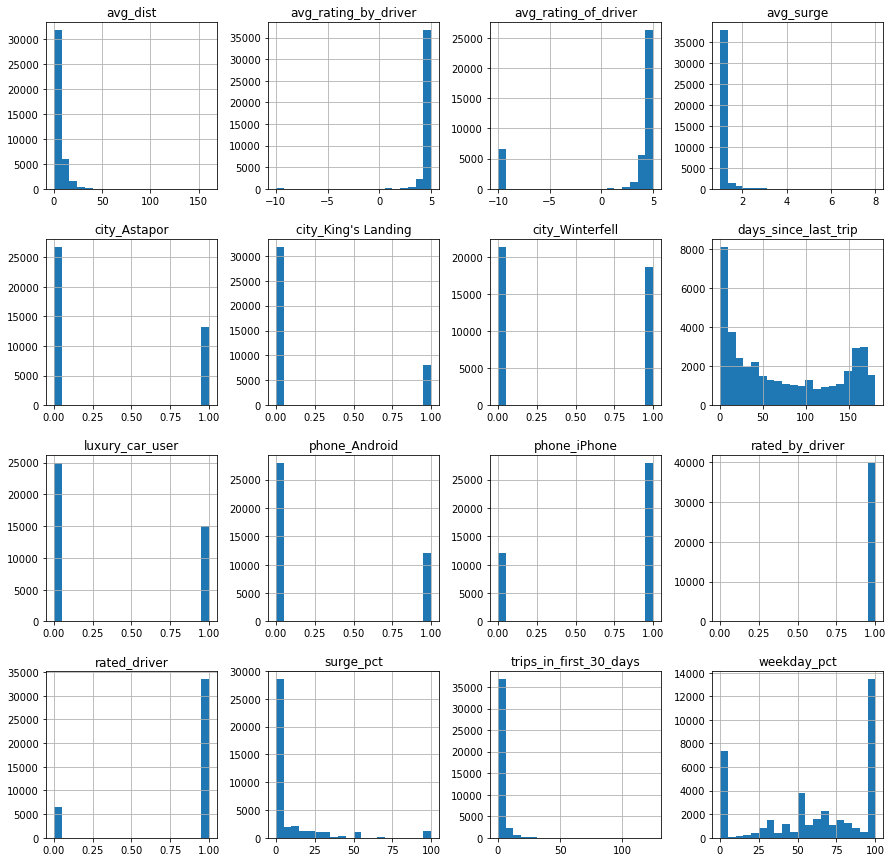

In [160]:
df.hist(figsize=(15,15), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130aff3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x132571350>]], dtype=object)

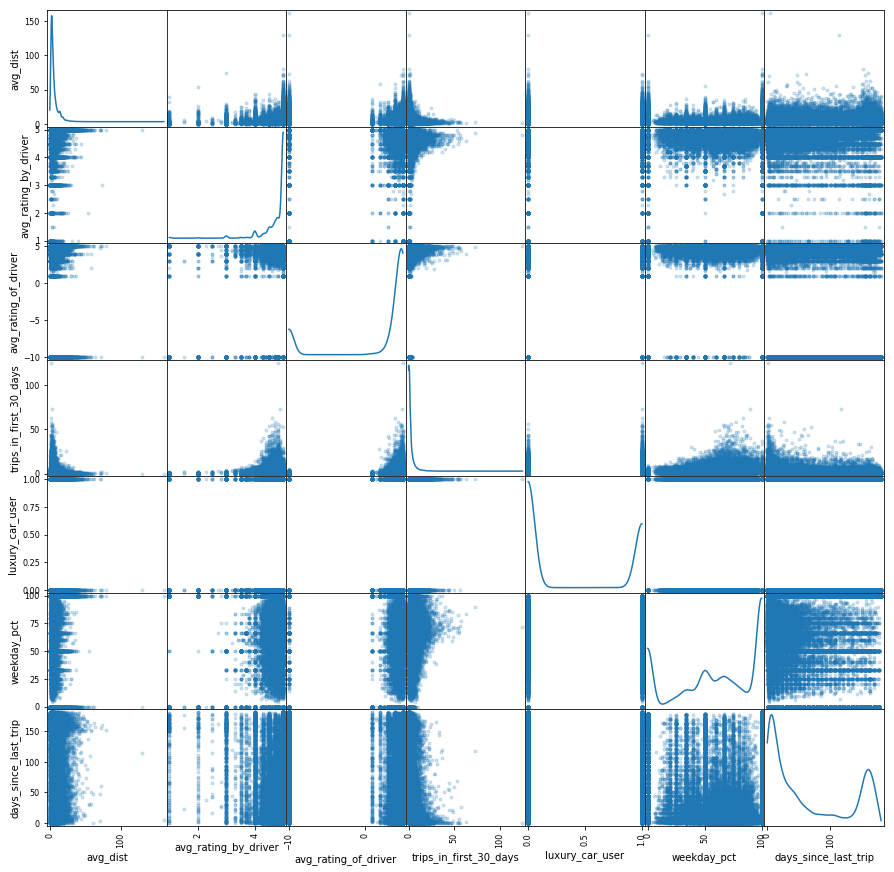

In [140]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'phone', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'days_since_last_trip']], alpha=0.2, figsize=(15, 15), diagonal='kde')

In [238]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',u'surge_pct',
       u'trips_in_first_30_days', u'luxury_car_user', u'weekday_pct', u'city_Astapor', u"city_King's Landing",
       u'phone_Android']

In [239]:
y = df['churned']
X = df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [240]:
rand_forest = RandomForestClassifier(oob_score=True)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [241]:
log_model = LogisticRegressionCV()
log_model.fit(X_train, y_train)
print log_model.score(X_test, y_test)

0.7203


In [242]:
feat_frame = pd.DataFrame({'feature_importance': rand_forest.feature_importances_, 'log_coeffs': log_model.coef_[0]}, index=cols)

In [245]:
feat_frame = feat_frame.sort_values('feature_importance', ascending=False)
feat_frame['positive_coeffs'] = feat_frame['log_coeffs'] > 0

In [246]:
feat_frame

,feature_importance,log_coeffs,positive_coeffs
avg_dist,0.305929,0.032229,True
weekday_pct,0.137154,0.000493,True
avg_rating_by_driver,0.117988,0.006100,True
surge_pct,0.117867,-0.002498,False
avg_rating_of_driver,0.086572,-0.044961,False
trips_in_first_30_days,0.083578,-0.108774,False
city_King's Landing,0.058789,-1.192827,False
phone_Android,0.037052,1.108849,True
luxury_car_user,0.034611,-0.862841,False
city_Astapor,0.020460,0.522917,True


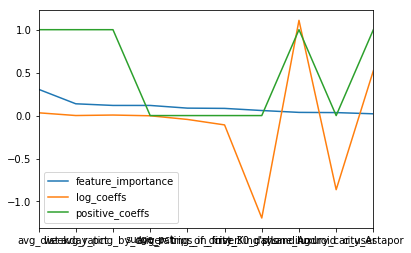

In [247]:
plt.plot(feat_frame['feature_importance'])